# Import modules

In [1]:
# pip install pysheds in terminal

In [2]:
import whitebox
wbt = whitebox.WhiteboxTools()
wbt.set_working_dir(".")


Decompressing WhiteboxTools_linux_amd64.zip ...
WhiteboxTools package directory: /srv/conda/envs/notebook/lib/python3.10/site-packages/whitebox
>Downloading testdata ...ection to www.whiteboxgeo.com                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [3]:
import whiteboxgui
whiteboxgui.show()


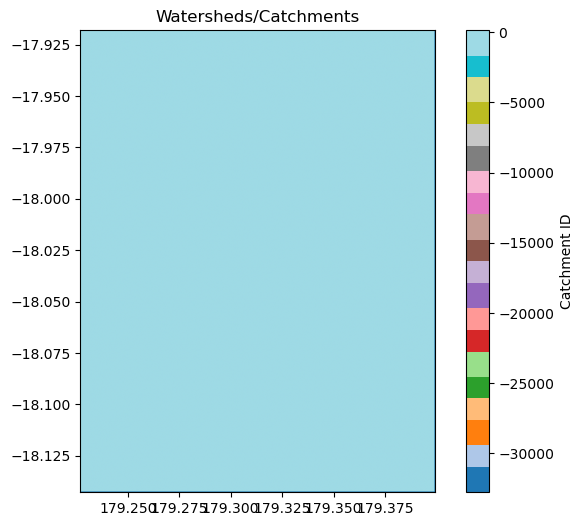

In [15]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

with rasterio.open('catchments.tif') as src:
    data = src.read(1)
    extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)

# Set zero (no data) to transparent
masked = np.ma.masked_where(data == 0, data)

plt.figure(figsize=(8,6))
cmap = plt.get_cmap('tab20', np.max(data))  # discrete colormap
plt.imshow(masked, extent=extent, cmap=cmap)
plt.colorbar(label='Catchment ID')
plt.title('Watersheds/Catchments')
plt.show()

In [5]:
help(wbt.fill_depressions)

Help on method fill_depressions in module whitebox.whitebox_tools:

fill_depressions(dem, output, fix_flats=True, flat_increment=None, max_depth=None, callback=None) method of whitebox.whitebox_tools.WhiteboxTools instance
    Fills all of the depressions in a DEM. Depression breaching should be preferred in most cases.
    
    Keyword arguments:
    
    dem -- Input raster DEM file.
    output -- Output raster file.
    fix_flats -- Optional flag indicating whether flat areas should have a small gradient applied.
    flat_increment -- Optional elevation increment applied to flat areas.
    max_depth -- Optional maximum depression depth to fill.
    callback -- Custom function for handling tool text outputs.



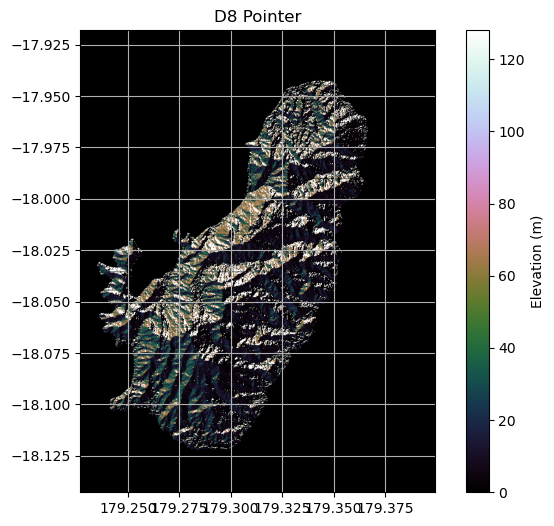

In [9]:
import rasterio
import matplotlib.pyplot as plt
with rasterio.open('d8p.tif') as src:
    dem = src.read(1)
    extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)

plt.figure(figsize=(8,6))
plt.imshow(dem, extent=extent, cmap='cubehelix')
plt.colorbar(label='Elevation (m)')
plt.title('D8 Pointer')
plt.grid(zorder=0)
plt.show()

In [ ]:
with rasterio.open('basins.tif') as src:
    dem = src.read(1)
    extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)

plt.figure(figsize=(8,6))
plt.imshow(dem, extent=extent, cmap='cubehelix')
plt.colorbar(label='Elevation (m)')
plt.title('D8 Pointer')
plt.grid(zorder=0)
plt.show()

In [ ]:
ocean_mask = np.where(dem == 0, 1, 0)  # 1 for ocean, 0 for land

plt.imshow(ocean_mask, extent=extent, cmap='Blues')
plt.title('Ocean Mask')
plt.show()

In [ ]:
wbt.fill_depressions(
    dem="dem_masked.tif",
    output="1_filled_dem.tif",
    fix_flats=True,
    # compress_rasters=False
)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
# from pysheds.grid import Grid
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import rasterio
from rasterio.transform import from_origin
import whitebox
%matplotlib inline

# Instatiate a grid from a DEM raster

In [17]:
# grid = Grid.from_raster('dem/dem_gau.tif')

Data from USGS hydrosheds project: https://hydrosheds.cr.usgs.gov/datadownload.php

In [18]:
# grid = Grid.from_raster('dem/dem_gau.tif', data_name='dem')

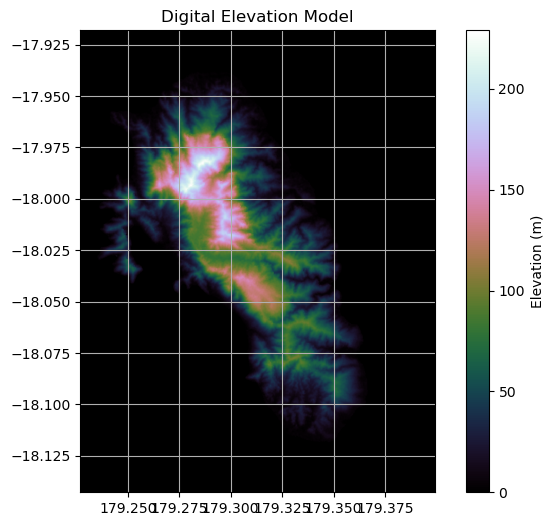

In [19]:
with rasterio.open('dem_gau.tif') as src:
    dem = src.read(1)
    extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)

plt.figure(figsize=(8,6))
plt.imshow(dem, extent=extent, cmap='cubehelix')
plt.colorbar(label='Elevation (m)')
plt.title('Digital Elevation Model')
plt.grid(zorder=0)
plt.show()

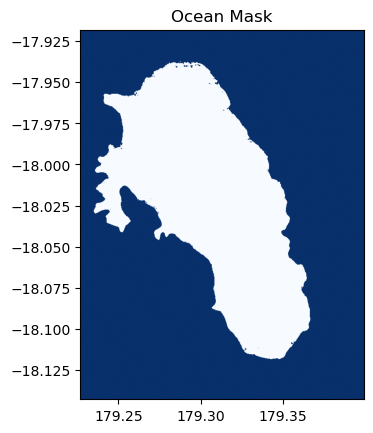

In [20]:
ocean_mask = np.where(dem == 0, 1, 0)  # 1 for ocean, 0 for land

plt.imshow(ocean_mask, extent=extent, cmap='Blues')
plt.title('Ocean Mask')
plt.show()

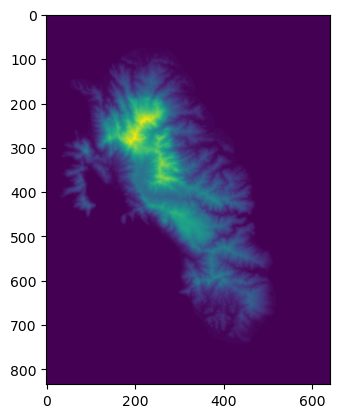

In [21]:
nodata_value = -9999
dem_nodata = np.where(np.isnan(dem), nodata_value, dem).astype(np.float32)
plt.imshow(dem)

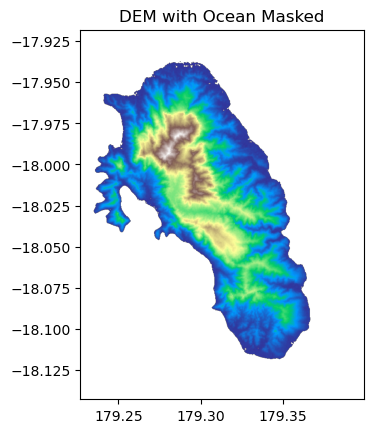

In [22]:
dem_masked = np.where(dem_nodata == 0, np.nan, dem_nodata)

plt.imshow(dem_masked, extent=extent, cmap='terrain')
plt.title('DEM with Ocean Masked')
plt.show()

In [23]:
wbt = whitebox.WhiteboxTools()
wbt.set_working_dir("")

In [24]:
wbt.fill_depressions(
    dem="dem_masked.tif",
    output="1_filled_dem.tif",
    fix_flats=True
)

./whitebox_tools --run="FillDepressions" --wd="." --dem='dem_masked.tif' --output='1_filled_dem.tif' --fix_flats -v --compress_rasters=False

******************************
* Welcome to FillDepressions *
* Powered by WhiteboxTools   *
* www.whiteboxgeo.com        *
******************************
Reading data...
thread 'main' panicked at whitebox-tools-app/src/main.rs:72:21:
No such file or directory (os error 2)
note: run with `RUST_BACKTRACE=1` environment variable to display a backtrace


0

In [25]:
wbt.fill_depressions(
    dem="dem_masked.tif",
    output="dem/1_filled_dem.tif"
)

./whitebox_tools --run="FillDepressions" --wd="." --dem='dem_masked.tif' --output='dem/1_filled_dem.tif' --fix_flats -v --compress_rasters=False

******************************
* Welcome to FillDepressions *
* Powered by WhiteboxTools   *
* www.whiteboxgeo.com        *
******************************
Reading data...
thread 'main' panicked at whitebox-tools-app/src/main.rs:72:21:
No such file or directory (os error 2)
note: run with `RUST_BACKTRACE=1` environment variable to display a backtrace


0

In [26]:
import os

print(os.path.isfile("dem_masked.tif"))     # Should be True if the file is in the current directory
print(os.path.isdir("dem"))                 # Should be True if the 'dem' folder exists

True
False


In [27]:
!./whitebox_tools --run="FillDepressions" --wd="dem" --dem="dem_masked.tif" --output="1_filled_dem.tif" --fix_flats -v --compress_rasters=False

/bin/bash: line 1: ./whitebox_tools: No such file or directory


In [13]:
height, width = dem_masked.shape
left, right, bottom, top = extent

pixel_width = (right - left) / width
pixel_height = (top - bottom) / height

transform = from_origin(left, top, pixel_width, pixel_height)  # top left corner

with rasterio.open(
    "dem/dem_masked.tif", "w",
    driver="GTiff",
    height=height,
    width=width,
    count=1,
    dtype=dem_masked.dtype,
    crs="EPSG:4326",  # update if you know your DEM's CRS is different
    transform=transform,
    nodata=0  # or use -9999 if 0 is valid in your data
) as dst:
    dst.write(dem_masked, 1)

In [14]:
print(dem_masked.shape)


(834, 640)


In [15]:
print("DEM min/max before writing:", np.nanmin(dem_masked), np.nanmax(dem_masked))
print("DEM unique values:", np.unique(dem_masked))

DEM min/max before writing: 1.0 229.0
DEM unique values: [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186.

In [16]:
grid = Grid()
grid.read_raster('dem_masked.tif', data_name='dem')

Raster([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [17]:
print("DEM array shape:", dem_masked.shape)
print("Extent:", extent)
print("Height:", height)
print("Width:", width)
print("Pixel width:", pixel_width)
print("Pixel height:", pixel_height)
print("Transform:", transform)
left = extent[0]
right = extent[1]
bottom = extent[2]
top = extent[3]

DEM array shape: (834, 640)
Extent: (179.22671092002446, 179.3991874545754, -18.14278054068527, -17.918022056598566)
Height: 834
Width: 640
Pixel width: 0.00026949458523586325
Pixel height: 0.0002694945852358546
Transform: | 0.00, 0.00, 179.23|
| 0.00,-0.00,-17.92|
| 0.00, 0.00, 1.00|


In [18]:

# These should match your data
dem_masked = np.random.rand(834, 640)  # Replace with your actual dem_masked
extent = (0, 640, 0, 834)  # Replace with your actual extent (left, right, bottom, top)

height, width = dem_masked.shape
left, right, bottom, top = extent

pixel_width = (right - left) / width
pixel_height = (top - bottom) / height

transform = from_origin(left, top, pixel_width, pixel_height)

with rasterio.open(
    "test_dem_masked.tif", "w",
    driver="GTiff",
    height=height,
    width=width,
    count=1,
    dtype=dem_masked.dtype,
    crs="EPSG:4326",
    transform=transform,
    nodata=0
) as dst:
    dst.write(dem_masked, 1)

with rasterio.open("test_dem_masked.tif") as src:
    print("Rasterio shape:", src.shape)  # Should be (834, 640)

Rasterio shape: (834, 640)


In [19]:
import numpy as np
import rasterio
from rasterio.transform import from_origin

dem_masked = np.random.rand(834, 640)  # use your real data
height, width = dem_masked.shape

# Use simple extent for debugging
left, right, bottom, top = 0, 640, 0, 834
pixel_width = (right - left) / width
pixel_height = (top - bottom) / height

print("DEM shape:", dem_masked.shape)
print("Height:", height, "Width:", width)
print("Pixel width:", pixel_width, "Pixel height:", pixel_height)

transform = from_origin(left, top, pixel_width, pixel_height)
print("Transform:", transform)

with rasterio.open(
    "debug_dem.tif", "w",
    driver="GTiff",
    height=height,
    width=width,
    count=1,
    dtype=dem_masked.dtype,
    crs="EPSG:4326",
    transform=transform,
    nodata=0
) as dst:
    dst.write(dem_masked, 1)

DEM shape: (834, 640)
Height: 834 Width: 640
Pixel width: 1.0 Pixel height: 1.0
Transform: | 1.00, 0.00, 0.00|
| 0.00,-1.00, 834.00|
| 0.00, 0.00, 1.00|


In [20]:
with rasterio.open("debug_dem.tif") as src:
    print("Rasterio shape:", src.shape)
    print("Rasterio transform:", src.transform)
    print("Rasterio dtype:", src.dtypes)
    print("Rasterio crs:", src.crs)

Rasterio shape: (834, 640)
Rasterio transform: | 1.00, 0.00, 0.00|
| 0.00,-1.00, 834.00|
| 0.00, 0.00, 1.00|
Rasterio dtype: ('float64',)
Rasterio crs: EPSG:4326


In [21]:
from pysheds.grid import Grid
grid = Grid()
grid.read_raster("debug_dem.tif", data_name="dem")
print("PySheds grid shape:", grid.shape)

PySheds grid shape: (1, 1)


In [22]:
grid = Grid()
grid.read_raster("dem/dem_masked.tif", data_name="dem")
print(grid.shape)  # Should also print (834, 640)

(1, 1)


In [23]:
grid.read_raster("dem/dem_masked.tif", data_name="dem")
print(grid.__dict__)

{'_viewfinder': 'affine' : Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)
'shape' : (1, 1)
'nodata' : 0
'crs' : <Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

'mask' : array([[ True]])}


In [24]:
with rasterio.open(
    "dem_masked.tif", "w",
    driver="GTiff",
    height=dem_masked.shape[0],
    width=dem_masked.shape[1],
    count=1,
    dtype=dem_masked.dtype,
    crs="EPSG:4326",
    # transform=transform,
    nodata=nodata_value
) as dst:
    dst.write(dem_masked, 1)

AttributeError: 'sGrid' object has no attribute 'dtype'

In [25]:
# dem = np.where(np.isnan(dem_masked), -9999, dem_masked).astype(np.float32)

# Resolve flats in DEM

In [27]:
grid = Grid()
grid.resolve_flats('dem_masked', out_name='inflated_dem')

TypeError: Data must be a Raster.

# Specify flow direction values

In [ ]:
         #N    NE    E    SE    S    SW    W    NW
dirmap = (64,  128,  1,   2,    4,   8,    16,  32)

# Convert DEM to flow direction grid

In [ ]:
grid.flowdir(data='inflated_dem', out_name='dir', dirmap=dirmap)

In [ ]:
fig = plt.figure(figsize=(8,6))
fig.patch.set_alpha(0)

plt.imshow(grid.dir, extent=grid.extent, cmap='viridis', zorder=2)
boundaries = ([0] + sorted(list(dirmap)))
plt.colorbar(boundaries= boundaries,
             values=sorted(dirmap))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Flow direction grid')
plt.grid(zorder=-1)
plt.tight_layout()
plt.savefig('img/flow_direction.png', bbox_inches='tight')

# Read a flow direction grid from a raster

Data from USGS hydrosheds project: https://hydrosheds.cr.usgs.gov/datadownload.php

In [ ]:
grid.read_raster('../data/n30w100_dir', data_name='dir')

# Examine grid

In [ ]:
grid.dir

In [ ]:
grid.dir.size

# Examine grid

In [ ]:
fig = plt.figure(figsize=(8,6))
fig.patch.set_alpha(0)

plt.imshow(grid.dir, extent=grid.extent, cmap='viridis', zorder=2)
boundaries = ([0] + sorted(list(dirmap)))
plt.colorbar(boundaries= boundaries,
             values=sorted(dirmap))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Flow direction grid')
plt.grid(zorder=-1)
plt.tight_layout()

# Delineate catchment

In [ ]:
# Specify pour point
x, y = -97.294167, 32.73750

# Delineate the catchment
grid.catchment(data='dir', x=x, y=y, dirmap=dirmap, out_name='catch',
               recursionlimit=15000, xytype='label', nodata_out=0)

In [ ]:
# Clip the bounding box to the catchment
grid.clip_to('catch')

In [ ]:
# Get a view of the catchment
catch = grid.view('catch', nodata=np.nan)

In [ ]:
# Plot the catchment
fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)

plt.grid('on', zorder=0)
im = ax.imshow(catch, extent=grid.extent, zorder=1, cmap='viridis')
plt.colorbar(im, ax=ax, boundaries=boundaries, values=sorted(dirmap), label='Flow Direction')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Delineated Catchment')
plt.savefig('img/catchment.png', bbox_inches='tight')

# Get flow accumulation

In [ ]:
grid.accumulation(data='catch', dirmap=dirmap, out_name='acc')

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)
plt.grid('on', zorder=0)
acc_img = np.where(grid.mask, grid.acc + 1, np.nan)
im = ax.imshow(acc_img, extent=grid.extent, zorder=2,
               cmap='cubehelix',
               norm=colors.LogNorm(1, grid.acc.max()))
plt.colorbar(im, ax=ax, label='Upstream Cells')
plt.title('Flow Accumulation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('img/flow_accumulation.png', bbox_inches='tight')

# Get distances to upstream cells

In [ ]:
grid.flow_distance(data='catch', x=x, y=y, dirmap=dirmap, out_name='dist',
                   xytype='label', nodata_out=np.nan)

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)
plt.grid('on', zorder=0)
im = ax.imshow(grid.dist, extent=grid.extent, zorder=2,
               cmap='cubehelix_r')
plt.colorbar(im, ax=ax, label='Distance to outlet (cells)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Flow Distance')
plt.savefig('img/flow_distance.png', bbox_inches='tight')